# Description
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Contents:

__1. Import Libraries__<br>
__2. Explore Data__<br>
__3. Data Analysis__<br>
__4. Visualization__<br>
__5. Cleaning Data__<br>
__6. Choosing Models__<br>
__7. Conclusion__<br>

## 1. Import Libraries

We will import all data libraries necessary all together

In [1]:
# data analysis libraries
import numpy as np
import pandas as pd
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# The output plotting commands will be displayed inline within frontends directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Explore Data

We read training and testing data using pandas read method and describe() function.

In [2]:
#import train and test CSV files
train = pd.read_csv("D:/My Documents/Data Science Personal Projects/Titanic Survival Predictions/train.csv")
test = pd.read_csv("D:/My Documents/Data Science Personal Projects/Titanic Survival Predictions/test.csv")
dataset = pd.concat(objs=[train,test], axis = 0).reset_index(drop= True)

#take a look at their summaries
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Peduzzi, Mr. Joseph",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 3. Data Analysis

We will take a look at the features (predictor variables) and get an idea of how complete they are

In [3]:
#List of features
features_list = train.columns
print(features_list)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
#See a sample
train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
754,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,65.0000,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
583,584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C


What are the data types for each columns<br>
Survived: int<br>
Pclass: int<br>
Name: string<br>
Sex: string<br>
Age: float<br>
SibSp: int<br>
Parch: int<br>
Ticket: string<br>
Fare: float<br>
Cabin: string<br>
Embarked: string<br>

In [5]:
#Check for missing data
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Observations:<br>
- There are 891 passengers in the training sent
- 177 data points for Age are missing, so we will need to impute missing data here
- Similarly, 687 data points for Cabin. Since so many are missing, we should drop this feature
- Embarked feature is missing 0.22% of data points, which is negligible
- We should also drop Ticket feature since they do not contain useful information

## 4. Visualization

Predictions:
- Sex: Female are more likely to survive
- Age: Young children are more likely to survive
- Pclass: People of higher socioeconomic classes are more likely to survive
- SibSp: People who have less siblings or spouses onboard are more likely to survive
- Parch: People who have less parents or children onboard are more likely to survive

We will now put the data up to visualization to see if the above predictions are accurate

% of females who survived:  74.2038216561
% of males who survived:  18.8908145581


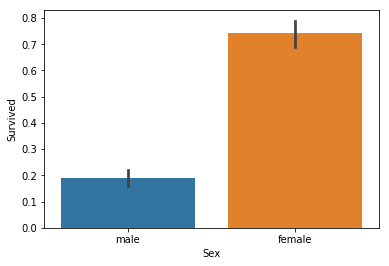

In [6]:
#Draw bar plot of survival by sex
sns.barplot(x = "Sex", y= "Survived", data = train)
#Show percentage of Survival
print("% of females who survived: ", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1] * 100)
print("% of males who survived: ", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1] * 100)

As predicted, females had better chance of surviving than males. We conclude that this Sex feature is important for our model.

% of Pclass 1 who survived:  62.962962963
% of Pclass 2 who survived:  47.2826086957
% of Pclass 3 who survived:  24.2362525458


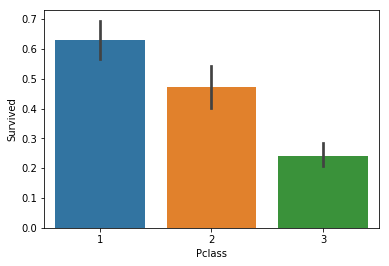

In [7]:
#Draw bar plot of survival by socioeconomic standings
sns.barplot(x = 'Pclass', y = 'Survived', data = train)
#Print percentage of people by Pclass that survived
print("% of Pclass 1 who survived: ", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1] * 100)
print("% of Pclass 2 who survived: ", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1] * 100)
print("% of Pclass 3 who survived: ", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1] * 100)


As predicted, high socioeconomic standings passengers had better chance of surviving. We will keep 'Pclass' feature as predictor for our model.

% of SibSp = 0 who survived:  34.5394736842
% of SibSp = 1 who survived:  53.5885167464
% of SibSp = 2 who survived:  46.4285714286


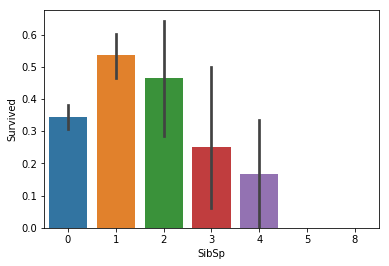

In [8]:
#Draw bar plot of survival by how many siblings they have onboard
sns.barplot(x = 'SibSp', y = 'Survived', data = train)
#Print just some percentage value
print("% of SibSp = 0 who survived: ", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1] * 100)
print("% of SibSp = 1 who survived: ", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1] * 100)
print("% of SibSp = 2 who survived: ", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1] * 100)

People who had more siblings or spouses aboard were less likely to survive. However, people who had 0 siblings or spouses were also less likely to survive.

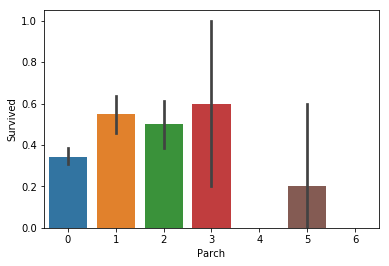

In [9]:
#Draw bar plot of survival by how many parents or children they have onboard
sns.barplot(x = 'Parch', y = 'Survived', data = train)

People with less than 4 parents or children were more likely to survive. However, people with none were also less likely to survive.

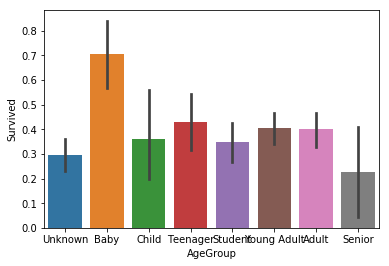

In [10]:
#Fill missing Age value with -0.5 as they are unknown data
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
#Sort Age into age groups
bins = [-1,0,5,12,18,24,35,60,np.inf]
labels = ['Unknown', 'Baby','Child','Teenager','Student','Young Adult','Adult','Senior']
#Use Pandas function cut to group them and put into dataframe
train['AgeGroup'] = pd.cut(train['Age'],bins, labels = labels)
test['AgeGroup'] = pd.cut(test['Age'],bins, labels = labels)
#Draw them
sns.barplot(x='AgeGroup',y = 'Survived', data=train)

In [11]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult


Babies are more likely to survive than any other age group

Cabin is likely correlated with socioeconomic class. We should see premium types of cabin showing higher survival rate. Premium cabins should be those data points that have record names instead of blank data, which we assume is economy class.

% of Cabin Haves = 1 who survived:  66.6666666667
% of Cabin Haves = 0 who survived:  29.9854439592


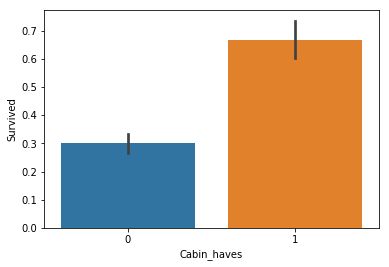

In [12]:
#Split Cabin data into the haves and havenots
train['Cabin_haves'] = (train["Cabin"].notnull().astype('int'))
test['Cabin_haves'] = (test["Cabin"].notnull().astype('int'))
#% of Cabin haves who survived
print("% of Cabin Haves = 1 who survived: ", train['Survived'][train["Cabin_haves"] == 1].value_counts(normalize = True)[1]*100)
print("% of Cabin Haves = 0 who survived: ", train['Survived'][train["Cabin_haves"] == 0].value_counts(normalize = True)[1]*100)
#Draw them
sns.barplot(x = "Cabin_haves", y = "Survived", data = train)

It seems people who could afford named cabins were more likely to survive after all.

# 5. Cleaning Data

We need to impute missing values and unnecessary information

In [13]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Cabin_haves
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Shine, Miss. Ellen Natalia",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


Missing data
- 1 Fare value is missing from the test set
- 177 values of Age feature are missing from the train set

### Cabin Feature

In [14]:
#We should drop Cabin feature since so much data is missing
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

### Ticket Feature

In [15]:
#We should also drop Ticket feature since they do not contain useful information
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [16]:
#Check data after dropping
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_haves
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0


### Embarked Feature

In [17]:
#Fill in missing value for Embarked Feature
print("Number of people embarking in Southampton (S): ")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)
print("Number of people embarking in Cherbourg (C): ")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)
print("Number of people embarking in Queenstown (Q): ")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S): 
644
Number of people embarking in Cherbourg (C): 
168
Number of people embarking in Queenstown (Q): 
77


In [18]:
#Since most people embarked from Southampton, we will fill missing data with Southampton
train = train.fillna({"Embarked": "S"})

### Age Feature

Since many age values are missing it is not advisable to use one sweeping data to replace all of them.
To address this, we look at most correlated features with Age among the other features. I single out Sex, Parch, Pclass and SibSP.

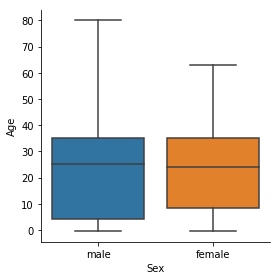

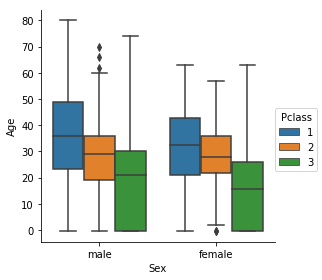

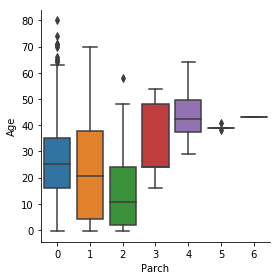

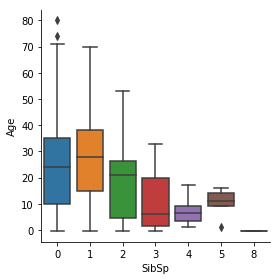

In [19]:
# Explore Age vs. Sex, Parch, Pclass and SibSP in the training set
g = sns.factorplot(y = 'Age', x = 'Sex', data = train, kind = 'box')
g = sns.factorplot(y = 'Age', x = 'Sex', hue = 'Pclass', data = train, kind = 'box')
g = sns.factorplot(y = 'Age', x = 'Parch', data = train, kind = 'box')
g = sns.factorplot(y = 'Age', x = 'SibSp', data = train, kind = 'box')

Age seems to be the same between Male and Female population so we can rule out Sex as predictor for Age. <br>
However the trend seems to be that 1st class passengers are oldest, and then 2nd class and then 3rd class. <br>
Thirdly, the more a passenger has parents/children, the older he tends to be. <br>
Lastly, The more a passenger has siblings/spouses, the younger he tends to be.

In [20]:
#Convert Sex into Categorical values 0 and 1
train['Sex'] = train['Sex'].map({"male": 0, "female":1})
test['Sex'] = test['Sex'].map({"male": 0, "female":1})

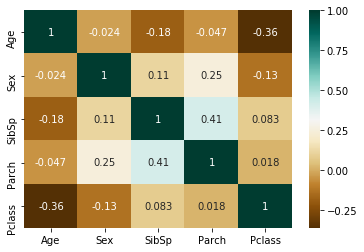

In [21]:
#Draw out correlation map
g = sns.heatmap(train[["Age", "Sex", "SibSp", "Parch", "Pclass"]].corr(), cmap = "BrBG", annot = True)

The above correlation map confirms that Age has little correlation with Sex. <br>
It has negative correlation with Pclass, Parch and SibSp. <br>
So we should impute missing values in Age by Pclass, Parch and SibSp. The strategy is to fill missing values with MEDIAN Age accross similar rows according to Parch, Pclass and SibSp.

In [22]:
#Filling missing value of Age using median age of similar rows according to Pclass, Parch and SibSp
#Index of NaN age rows
index_NaN_age_train = list(train["Age"][train["Age"].isnull()].index)

for i in index_NaN_age_train:
    age_med = train["Age"].median()
    age_pred = train["Age"][((train['SibSp'] == train.iloc[i]["SibSp"]) & (dataset['Parch'] == dataset.iloc[i]["Parch"]) & (dataset['Pclass'] == train.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred):
        train["Age"].iloc[i] = age_pred
    else:
        train["Age"].iloc[i] = age_med

In [23]:
#Sort Age into age groups
bins = [-1,0,5,12,18,24,35,60,np.inf]
labels = ['Unknown', 'Baby','Child','Teenager','Student','Young Adult','Adult','Senior']
#Use Pandas function cut to group them and put into dataframe
train['AgeGroup'] = pd.cut(train['Age'],bins, labels = labels)
test['AgeGroup'] = pd.cut(test['Age'],bins, labels = labels)

In [24]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7, 'Unknown':8}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)

In [25]:
train.Age.unique()

array([ 22.  ,  38.  ,  26.  ,  35.  ,  -0.5 ,  54.  ,   2.  ,  27.  ,
        14.  ,   4.  ,  58.  ,  20.  ,  39.  ,  55.  ,  31.  ,  34.  ,
        15.  ,  28.  ,   8.  ,  19.  ,  40.  ,  66.  ,  42.  ,  21.  ,
        18.  ,   3.  ,   7.  ,  49.  ,  29.  ,  65.  ,  28.5 ,   5.  ,
        11.  ,  45.  ,  17.  ,  32.  ,  16.  ,  25.  ,   0.83,  30.  ,
        33.  ,  23.  ,  24.  ,  46.  ,  59.  ,  71.  ,  37.  ,  47.  ,
        14.5 ,  70.5 ,  32.5 ,  12.  ,   9.  ,  36.5 ,  51.  ,  55.5 ,
        40.5 ,  44.  ,   1.  ,  61.  ,  56.  ,  50.  ,  36.  ,  45.5 ,
        20.5 ,  62.  ,  41.  ,  52.  ,  63.  ,  23.5 ,   0.92,  43.  ,
        60.  ,  10.  ,  64.  ,  13.  ,  48.  ,   0.75,  53.  ,  57.  ,
        80.  ,  70.  ,  24.5 ,   6.  ,   0.67,  30.5 ,   0.42,  34.5 ,  74.  ])

In [26]:
train.AgeGroup.unique()

array([4, 6, 5, 8, 1, 3, 2, 7], dtype=int64)

In [27]:
#Filling missing value of Age using median age of similar rows according to Pclass, Parch and SibSp
#Index of NaN age rows
index_NaN_age_test = list(test["Age"][test["Age"].isnull()].index)

for i in index_NaN_age_test:
    age_med = test["Age"].median()
    age_pred = test["Age"][((test['SibSp'] == test.iloc[i]["SibSp"]) & (dataset['Parch'] == dataset.iloc[i]["Parch"]) & (dataset['Pclass'] == test.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred):
        test["Age"].iloc[i] = age_pred
    else:
        test["Age"].iloc[i] = age_med

In [28]:
#Sort Age into age groups - Already done above together with Train set

In [29]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7, 'Unknown':8}
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

In [30]:
test.Age.unique()

array([ 34.5 ,  47.  ,  62.  ,  27.  ,  22.  ,  14.  ,  30.  ,  26.  ,
        18.  ,  21.  ,  -0.5 ,  46.  ,  23.  ,  63.  ,  24.  ,  35.  ,
        45.  ,  55.  ,   9.  ,  48.  ,  50.  ,  22.5 ,  41.  ,  33.  ,
        18.5 ,  25.  ,  39.  ,  60.  ,  36.  ,  20.  ,  28.  ,  10.  ,
        17.  ,  32.  ,  13.  ,  31.  ,  29.  ,  28.5 ,  32.5 ,   6.  ,
        67.  ,  49.  ,   2.  ,  76.  ,  43.  ,  16.  ,   1.  ,  12.  ,
        42.  ,  53.  ,  26.5 ,  40.  ,  61.  ,  60.5 ,   7.  ,  15.  ,
        54.  ,  64.  ,  37.  ,  34.  ,  11.5 ,   8.  ,   0.33,  38.  ,
        57.  ,  40.5 ,   0.92,  19.  ,  36.5 ,   0.75,   0.83,  58.  ,
         0.17,  59.  ,  14.5 ,  44.  ,   5.  ,  51.  ,   3.  ,  38.5 ])

In [31]:
test.AgeGroup.unique()

array([5, 6, 7, 4, 3, 8, 2, 1], dtype=int64)

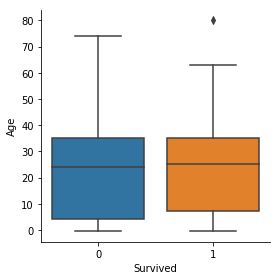

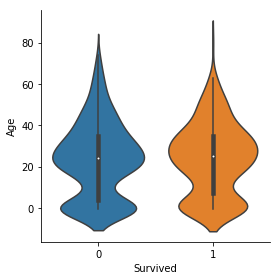

In [32]:
g = sns.factorplot(x="Survived", y = "Age", data = train, kind = "box")
g = sns.factorplot(x="Survived", y = "Age", data = train, kind = "violin")

No difference between median value of age in survived and non-survived populations. However in the violin plot, we still see young passengers having higher survival rate.

### Name Feature

Dropping name feature because it does not help as predictor

In [33]:
#drop the name feature since it contains no more useful information.
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [34]:
#check data after dropping
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_haves
0,1,0,3,0,22.0,1,0,7.2500,S,4,0
1,2,1,1,1,38.0,1,0,71.2833,C,6,1
2,3,1,3,1,26.0,0,0,7.9250,S,5,0
3,4,1,1,1,35.0,1,0,53.1000,S,5,1
4,5,0,3,0,35.0,0,0,8.0500,S,5,0


### Sex Feature

In [35]:
#we would map each Sex value to numerical value 0 and 1, but we already done that at the correlation chart

In [36]:
test.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_haves
0,892,3,0,34.5,0,0,7.8292,Q,5,0
1,893,3,1,47.0,1,0,7.0000,S,6,0
2,894,2,0,62.0,0,0,9.6875,Q,7,0


### Embarked Feature

In [37]:
#similarly, map each Embarked value to a numerical value, 1, 2 and 3
embarked_mapping = {"S" : 1, "C" : 2, "Q" : 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_haves
0,1,0,3,0,22.0,1,0,7.2500,1,4,0
1,2,1,1,1,38.0,1,0,71.2833,2,6,1
2,3,1,3,1,26.0,0,0,7.9250,1,5,0


### Fare Feature

First step is to fill in missing Fare values

In [38]:
#fill in missing value in fare based on the mean value of Pclass
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(),4)

#group fare values into 4 groups
train['FareBand'] = pd.qcut(train['Fare'],4,labels = [1,2,3,4])
test['FareBand'] = pd.qcut(test['Fare'],4,labels = [1,2,3,4])

In [45]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_haves,FareBand
0,892,3,0,34.5,0,0,7.8292,3,5,0,1
1,893,3,1,47.0,1,0,7.0000,1,6,0,1
2,894,2,0,62.0,0,0,9.6875,3,7,0,2
3,895,3,0,27.0,0,0,8.6625,1,5,0,2
4,896,3,1,22.0,1,1,12.2875,1,4,0,2


In [46]:
#check fare values
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_haves,FareBand
0,1,0,3,0,22.0,1,0,7.2500,1,4,0,1
1,2,1,1,1,38.0,1,0,71.2833,2,6,1,4
2,3,1,3,1,26.0,0,0,7.9250,1,5,0,2
3,4,1,1,1,35.0,1,0,53.1000,1,5,1,4
4,5,0,3,0,35.0,0,0,8.0500,1,5,0,2


In [41]:
print(pd.isnull(train).sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
AgeGroup       0
Cabin_haves    0
FareBand       0
dtype: int64


# 6. Choosing Models

### Split the Training Data

We use part of the training set (22% of the set) to test the accuracy in different models.

In [50]:
from sklearn.model_selection import train_test_split
X = train.drop(['Survived', 'PassengerId', 'Age', 'Fare'], axis=1)
y = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22, random_state = 0)

Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### What are the models?

We will use the following models with the training data

- Gaussian Naive Bayes
- Logistic Regression
- Support Vector Machines
- Perceptron
- Decision Tree Classifier
- Random Forest Classifier
- KNN or k-Nearest Neighbors
- Stochastic Gradient Descent
- Gradient Boosting Classifier

For each model, we set the model, fit it with 80% of our training data, predict for 20% of the training data and check the accuracy.

In [52]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gaussian)

80.71


In [57]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

82.23


In [58]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

81.22


In [59]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_linear_svc)

80.2


In [60]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_perceptron)

58.88


In [61]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
y_pred = decisiontree.predict(X_test)
acc_decisiontree = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_decisiontree)

82.74


In [62]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

83.25


In [63]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_knn)

81.73


In [64]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_sgd)

80.71


In [65]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
y_pred = gbk.predict(X_test)
acc_gbk = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gbk)

85.28


### Accuracy of each model

In [66]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,Gradient Boosting Classifier,85.28
3,Random Forest,83.25
7,Decision Tree,82.74
2,Logistic Regression,82.23
1,KNN,81.73
0,Support Vector Machines,81.22
4,Naive Bayes,80.71
8,Stochastic Gradient Descent,80.71
6,Linear SVC,80.20
5,Perceptron,58.88


### We therefore should use Random Forest Model